In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

marketing_data = pd.read_csv('input_data/bank.csv', sep=';', usecols=['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome','y'])
marketing_data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [2]:
marketing_data.drop(columns=['y'])
marketing_data['job'] = marketing_data['job'].astype('category')
marketing_data['job'] = marketing_data['job'].cat.codes

marketing_data['marital'] = marketing_data['marital'].astype('category')
marketing_data['marital'] = marketing_data['marital'].cat.codes

marketing_data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,7,1,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,4,2,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,4,1,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,1,1,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


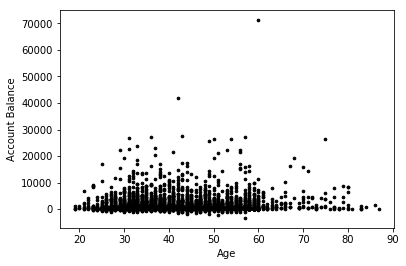

In [6]:
f1 = marketing_data['job'].values
f2 = marketing_data['balance'].values
f3 = marketing_data['age'].values
f4 =  marketing_data['marital'].values
plt.xlabel('Age')
plt.ylabel('Account Balance')
plt.scatter(f3, f2, c='black', s=7)
plt.show()

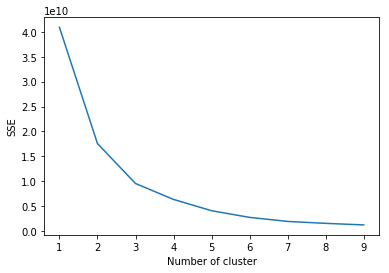

In [4]:
X=np.matrix(list(zip(f1, f2, f3, f4)))
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=15).fit(X)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

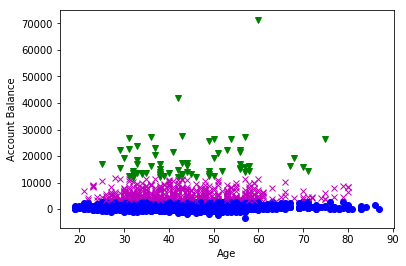

In [7]:
M=np.matrix(list(zip(f1, f2, f3, f4)))
kmeans = KMeans(n_clusters=3, max_iter=15).fit(M)
centers = kmeans.cluster_centers_
y_pred = kmeans.predict(M)

colors = ['b', 'g', 'm', 'y', 'c']
markers = ['o', 'v', 'x', 'o', 's']
center_colors = colors[:len(y_pred)]

plt.xlabel('Age')
plt.ylabel('Account Balance')
for i, l in enumerate(kmeans.labels_):
    plt.plot(f3[i], f2[i], color=colors[l], marker=markers[l],ls='None')